In [35]:
import string
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import numpy as np
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import math
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [36]:
df = pd.read_csv('YOUR_PATH/emails.csv')
df.rename(columns = {'text':'mail', 'spam':'label'}, inplace = True)
print(df['label'].value_counts())

0    4359
1    1368
Name: label, dtype: int64


In [37]:
df['label'].replace(1,'spam', inplace=True)
df['label'].replace(0,'ham', inplace=True)
df.head(4)

,mail,label
0,Subject: naturally irresistible your corporate...,spam
1,Subject: the stock trading gunslinger fanny i...,spam
2,Subject: unbelievable new homes made easy im ...,spam
3,Subject: 4 color printing special request add...,spam


Puntuation removal

In [38]:
def remove_punctuation(text):
    punt_free = "".join([i for i in text if i not in string.punctuation])
    return punt_free
df['punct_txt'] = df['mail'].apply(lambda x:remove_punctuation(x))
df.head(4)

,mail,label,punct_txt
0,Subject: naturally irresistible your corporate...,spam,Subject naturally irresistible your corporate ...
1,Subject: the stock trading gunslinger fanny i...,spam,Subject the stock trading gunslinger fanny is...
2,Subject: unbelievable new homes made easy im ...,spam,Subject unbelievable new homes made easy im w...
3,Subject: 4 color printing special request add...,spam,Subject 4 color printing special request addi...


Numbers removal

In [39]:
def numb_removal(txt):
    txt = re.sub(r'\d+', '', txt)
    return txt
df['punct_txt'] = df['punct_txt'].apply(lambda x:numb_removal(x))


Lowercasing

In [40]:
df['low_txt'] = df['punct_txt'].apply(lambda x:x.lower())
df.head(4)

,mail,label,punct_txt,low_txt
0,Subject: naturally irresistible your corporate...,spam,Subject naturally irresistible your corporate ...,subject naturally irresistible your corporate ...
1,Subject: the stock trading gunslinger fanny i...,spam,Subject the stock trading gunslinger fanny is...,subject the stock trading gunslinger fanny is...
2,Subject: unbelievable new homes made easy im ...,spam,Subject unbelievable new homes made easy im w...,subject unbelievable new homes made easy im w...
3,Subject: 4 color printing special request add...,spam,Subject color printing special request addit...,subject color printing special request addit...


Tokenization

In [41]:
def tokenizer(txt):
    tokens = word_tokenize(txt)
    return tokens
df['tok_txt'] = df['low_txt'].apply(lambda x: tokenizer(x))
df.head(4)

,mail,label,punct_txt,low_txt,tok_txt
0,Subject: naturally irresistible your corporate...,spam,Subject naturally irresistible your corporate ...,subject naturally irresistible your corporate ...,"[subject, naturally, irresistible, your, corpo..."
1,Subject: the stock trading gunslinger fanny i...,spam,Subject the stock trading gunslinger fanny is...,subject the stock trading gunslinger fanny is...,"[subject, the, stock, trading, gunslinger, fan..."
2,Subject: unbelievable new homes made easy im ...,spam,Subject unbelievable new homes made easy im w...,subject unbelievable new homes made easy im w...,"[subject, unbelievable, new, homes, made, easy..."
3,Subject: 4 color printing special request add...,spam,Subject color printing special request addit...,subject color printing special request addit...,"[subject, color, printing, special, request, a..."


In [42]:
stop_w = pd.read_csv('YOUR_PATH/stopwords.csv')
stopwords = list(stop_w['x'])

Stop word removal

In [43]:
def remove_stop(txt):
    out = [i for i in txt if i not in stopwords]
    return out
df['stop_txt'] = df['tok_txt'].apply(lambda x: remove_stop(x))
df.head(4)

,mail,label,punct_txt,low_txt,tok_txt,stop_txt
0,Subject: naturally irresistible your corporate...,spam,Subject naturally irresistible your corporate ...,subject naturally irresistible your corporate ...,"[subject, naturally, irresistible, your, corpo...","[naturally, irresistible, corporate, identity,..."
1,Subject: the stock trading gunslinger fanny i...,spam,Subject the stock trading gunslinger fanny is...,subject the stock trading gunslinger fanny is...,"[subject, the, stock, trading, gunslinger, fan...","[stock, trading, gunslinger, fanny, merrill, m..."
2,Subject: unbelievable new homes made easy im ...,spam,Subject unbelievable new homes made easy im w...,subject unbelievable new homes made easy im w...,"[subject, unbelievable, new, homes, made, easy...","[unbelievable, homes, made, easy, im, wanting,..."
3,Subject: 4 color printing special request add...,spam,Subject color printing special request addit...,subject color printing special request addit...,"[subject, color, printing, special, request, a...","[color, printing, special, request, additional..."


Lemmatization

In [44]:
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(txt):
    lemm_txt = [wordnet_lemmatizer.lemmatize(word) for word in txt]
    return lemm_txt
df['lem_txt'] = df['stop_txt'].apply(lambda x: lemmatizer(x))
df.head(4)

,mail,label,punct_txt,low_txt,tok_txt,stop_txt,lem_txt
0,Subject: naturally irresistible your corporate...,spam,Subject naturally irresistible your corporate ...,subject naturally irresistible your corporate ...,"[subject, naturally, irresistible, your, corpo...","[naturally, irresistible, corporate, identity,...","[naturally, irresistible, corporate, identity,..."
1,Subject: the stock trading gunslinger fanny i...,spam,Subject the stock trading gunslinger fanny is...,subject the stock trading gunslinger fanny is...,"[subject, the, stock, trading, gunslinger, fan...","[stock, trading, gunslinger, fanny, merrill, m...","[stock, trading, gunslinger, fanny, merrill, m..."
2,Subject: unbelievable new homes made easy im ...,spam,Subject unbelievable new homes made easy im w...,subject unbelievable new homes made easy im w...,"[subject, unbelievable, new, homes, made, easy...","[unbelievable, homes, made, easy, im, wanting,...","[unbelievable, home, made, easy, im, wanting, ..."
3,Subject: 4 color printing special request add...,spam,Subject color printing special request addit...,subject color printing special request addit...,"[subject, color, printing, special, request, a...","[color, printing, special, request, additional...","[color, printing, special, request, additional..."


In [45]:
df2 = df[['label', 'mail', 'lem_txt']].copy()
df2.rename(columns = {'lem_txt':'clean_txt', 'mail': 'raw_txt'}, inplace = True)
df2.head(4)


,label,raw_txt,clean_txt
0,spam,Subject: naturally irresistible your corporate...,"[naturally, irresistible, corporate, identity,..."
1,spam,Subject: the stock trading gunslinger fanny i...,"[stock, trading, gunslinger, fanny, merrill, m..."
2,spam,Subject: unbelievable new homes made easy im ...,"[unbelievable, home, made, easy, im, wanting, ..."
3,spam,Subject: 4 color printing special request add...,"[color, printing, special, request, additional..."


From text to Document-Term Matrix

In [46]:
def concatenate(txt):
   txt =  " ".join(txt)
   return txt

for i in range(0,len(df['label'])):
   df2['clean_txt'][i] = concatenate(df2['clean_txt'][i])


In [47]:
countvec = CountVectorizer()
docs = list(df2['clean_txt'])

Binarization of Document Term Matrix

In [48]:
sklearn_dtm = countvec.fit_transform(docs)
dtm = pd.DataFrame(sklearn_dtm.toarray(), columns=countvec.get_feature_names_out())
dtm = dtm/dtm.max()
dtm = np.ceil(dtm)
dtm = dtm.astype(int)

Dataset split into train/test

In [49]:
train_dtm, test_dtm = train_test_split(dtm, test_size=0.5, random_state=123)
label_train = list(df2['label'][train_dtm.index])
label_test = list(df2['label'][test_dtm.index])

Dictionary extraction

In [50]:
freq = np.ravel(train_dtm.sum(axis=0))
words_dictio =  train_dtm.columns.values
dictio = pd.DataFrame({'word': words_dictio, 'freq': freq}, columns=['word','freq'])
dictio

,word,freq
0,aa,14
1,aaa,3
2,aaaenerfax,1
3,aadedeji,0
4,aagrawal,1
...,...,...
30558,zymg,3
30559,zzmacmac,0
30560,zzn,1
30561,zzncacst,1


Feature selection by Log_Ratio criterion 

In [ ]:
train_dtm.index = label_train
train_dtm.head()

In [ ]:
dict_spam = dictio.copy()
dict_ham = dictio.copy()

for i in range(0,len(dict_spam)):
    dict_spam['freq'][i] = train_dtm.loc[train_dtm.index == 'spam',dict_spam['word'][i]].sum()
dict_spam

dict_ham['freq'] = dictio['freq'] - dict_spam['freq']

Conditional probabilities

In [ ]:
alfa = 0.001 # smoothing parameter

tot_spam = dict_spam['freq'].sum()
tot_ham = dict_ham['freq'].sum()
dict_spam['prob_cond'] = (dict_spam['freq'] + alfa)/(tot_spam + 2*alfa)
dict_ham['prob_cond'] = (dict_ham['freq'] + alfa)/(tot_ham + 2*alfa)

In [ ]:
dictio['spam_prob'] = dict_spam['prob_cond']
dictio['ham_prob'] = dict_ham['prob_cond']
dictio

Log_Ratio evaluation

In [ ]:
log_words = pd.DataFrame({'words':dictio['word'], 'log_prob':0})
log_words['log_prob'] = abs(np.log10(dictio['spam_prob']/dictio['ham_prob']))


Lambda treshold

In [ ]:
seq_perc = np.arange(0,1,0.05)
q = np.quantile(log_words['log_prob'], seq_perc)
treshold = q[17]
q

In [ ]:
deleted_word = list()

for i in range(0,len(log_words)):
    if log_words['log_prob'][i] <= treshold:
        deleted_word.append(log_words['words'][i])

In [ ]:
len(dictio['word'])- len(deleted_word)

In [ ]:
train_dtm = train_dtm.drop(deleted_word, axis=1)
test_dtm = test_dtm.drop(deleted_word, axis=1)

In [ ]:
train_dtm

Filtering by findFreqTerms

In [51]:
def find_freq_words(x, low_b):
    freq_w = list()
    for i in range(0,len(x['word'])):
        word_freq = x['freq'][i]
        if word_freq <= low_b:
            x = x.drop(i)
    return x   
new_dictio = find_freq_words(dictio, 40)
new_dictio

,word,freq
49,ability,77
125,academic,60
151,access,204
185,account,125
191,accounting,48
...,...,...
30182,yahoo,48
30218,year,419
30236,yesterday,102
30276,york,68


In [52]:
filt_words = list(new_dictio['word'])
words = list(dictio['word'])
words_removed = [elem for elem in words if elem not in filt_words]

In [53]:
train_dtm = train_dtm.drop(words_removed, axis=1)
test_dtm = test_dtm.drop(words_removed, axis=1)

Bernoulli Naive Bayes Classifier

In [54]:
model = BernoulliNB()
model.fit(train_dtm, label_train)
test = model.predict(test_dtm)
report = classification_report(test, label_test)
print(report)

              precision    recall  f1-score   support

         ham       0.93      1.00      0.96      2029
        spam       0.99      0.81      0.90       835

    accuracy                           0.94      2864
   macro avg       0.96      0.91      0.93      2864
weighted avg       0.95      0.94      0.94      2864



In [55]:
confusion_matrix(test, label_test)

array([[2025,    4],
       [ 155,  680]])

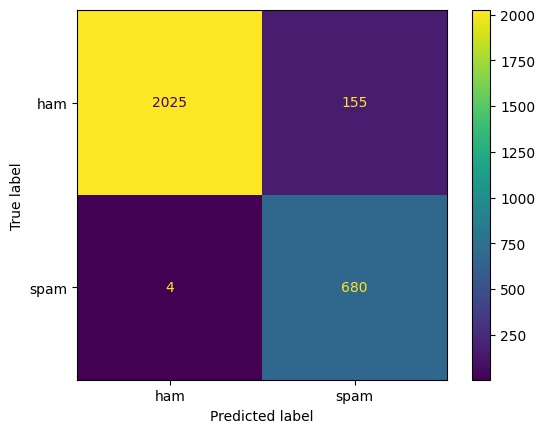

In [56]:
cm = confusion_matrix(label_test, test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot()
plt.show()